In [ ]:
!wget https://img.freepik.com/foto-gratis/primer-disparo-flor-morada_181624-25863.jpg

--2024-06-01 11:46:55--  https://img.freepik.com/foto-gratis/primer-disparo-flor-morada_181624-25863.jpg
Resolving img.freepik.com (img.freepik.com)... 184.26.127.9, 184.26.127.33, 2600:1417:76::6874:f311, ...
Connecting to img.freepik.com (img.freepik.com)|184.26.127.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65493 (64K) [image/jpeg]
Saving to: ‘primer-disparo-flor-morada_181624-25863.jpg’

primer-disparo-flor 100%[===================>]  63.96K  54.0KB/s    in 1.2s    

2024-06-01 11:47:00 (54.0 KB/s) - ‘primer-disparo-flor-morada_181624-25863.jpg’ saved [65493/65493]



In [ ]:
#manipulacion de matrices
import numpy as np
#manipulacion de dataframe
import pandas as pd
#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#manipulacion de imagenes
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


**Adquisición de datos**

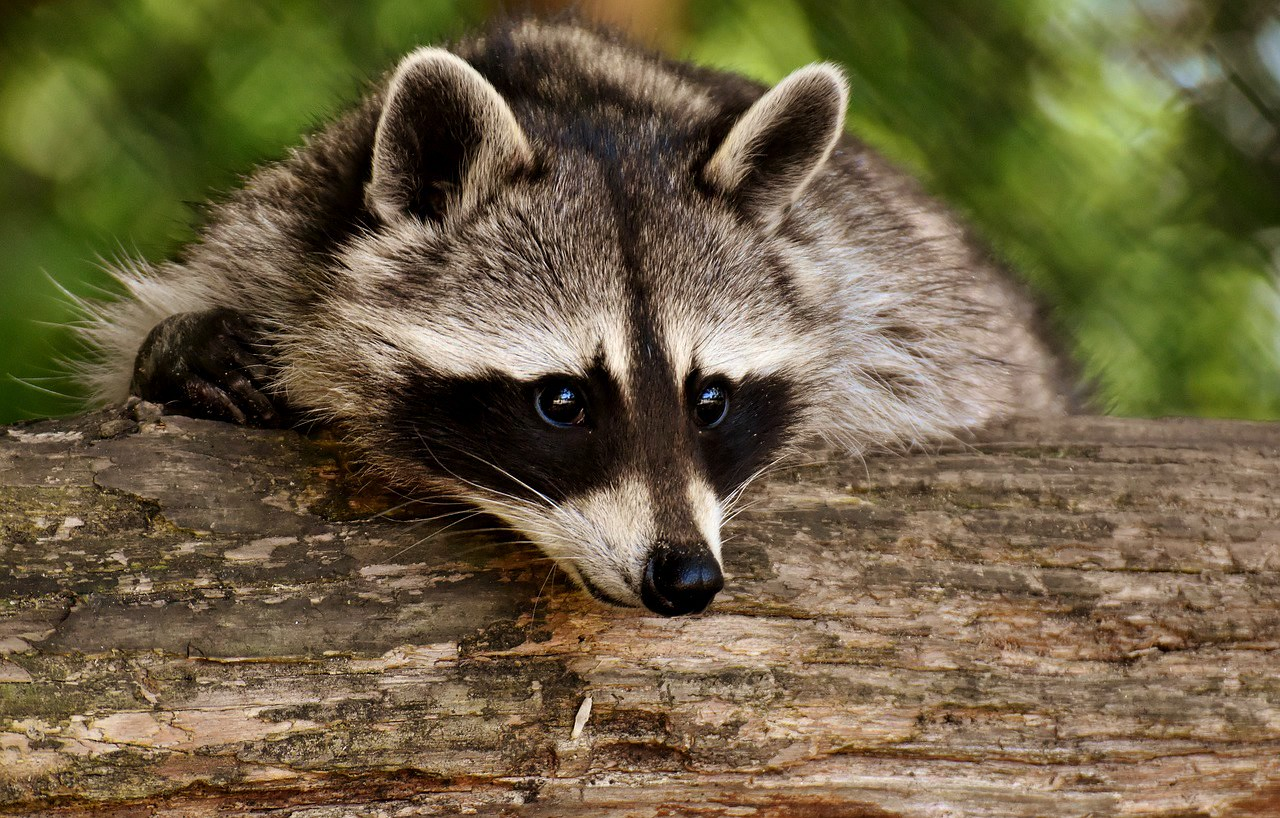

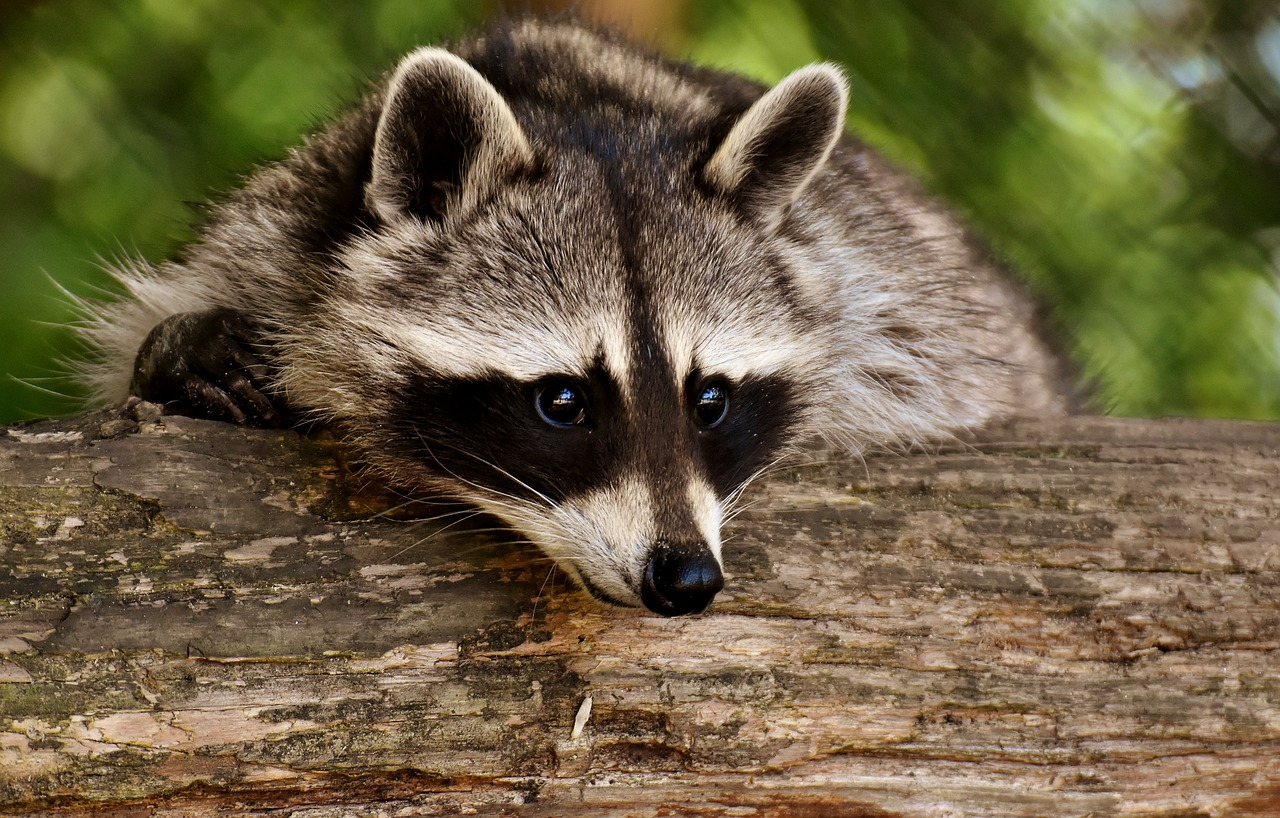

In [ ]:
# Cargar las imágenes
image_fake = cv2.imread("sample_data/mapache-falso.jpeg")
image_truth = cv2.imread("sample_data/mapache-2.jpg")

# Mostrar las imágenes usando cv2_imshow
cv2_imshow(image_fake)
cv2_imshow(image_truth)


plt.show()


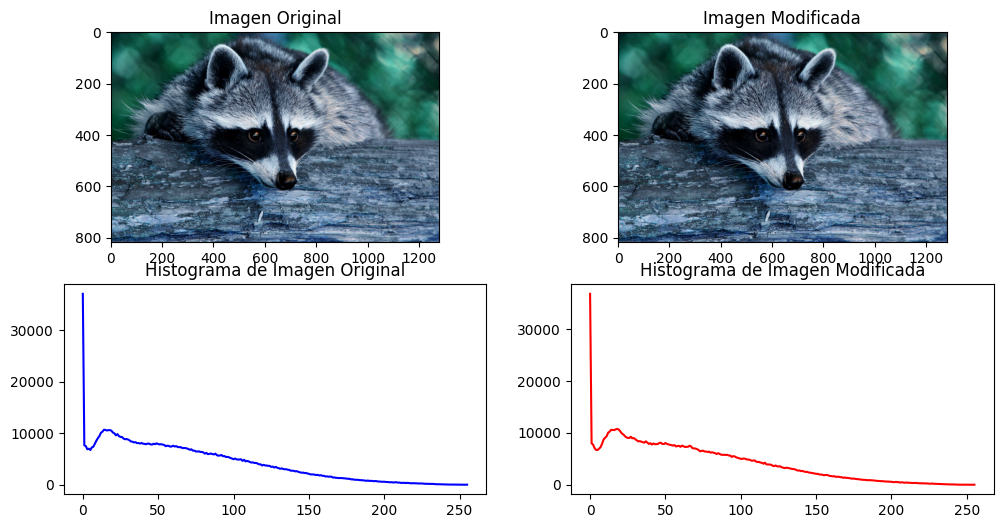

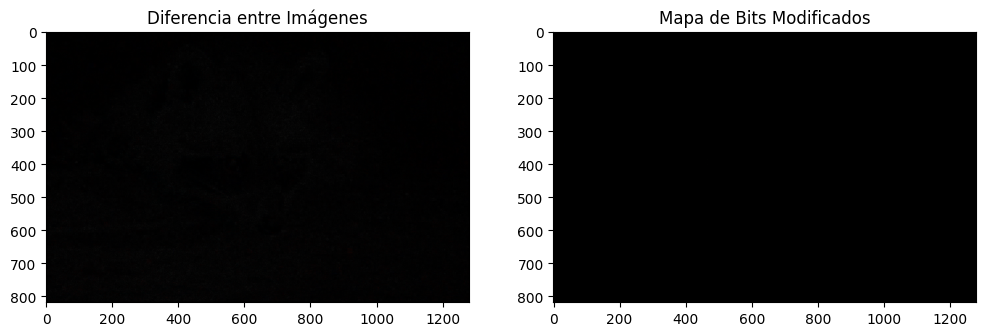

In [ ]:
if image_fake is None or image_truth is None:
    print("Error al cargar las imágenes")
else:
    # Calcular el histograma de las imágenes
    hist_original = cv2.calcHist([image_fake], [0], None, [256], [0, 256])
    hist_modificada = cv2.calcHist([image_truth], [0], None, [256], [0, 256])

    # Mostrar los histogramas
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(image_truth, cmap='gray')
    plt.title("Imagen Original")

    plt.subplot(2, 2, 2)
    plt.imshow(image_fake, cmap='gray')
    plt.title("Imagen Modificada")

    plt.subplot(2, 2, 3)
    plt.plot(hist_original, color='blue')
    plt.title("Histograma de Imagen Original")

    plt.subplot(2, 2, 4)
    plt.plot(hist_modificada, color='red')
    plt.title("Histograma de Imagen Modificada")

    plt.show()

    # Calcular la diferencia entre las imágenes
    diferencia = cv2.absdiff(image_truth , image_fake)

    # Crear un mapa de bits modificados (1 si el LSB es diferente, 0 si es igual)
    bits_modificados = (image_truth  % 2) ^ (image_fake % 2)

    # Mostrar la diferencia y el mapa de bits modificados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(diferencia, cmap='gray')
    plt.title("Diferencia entre Imágenes")

    plt.subplot(1, 2, 2)
    plt.imshow(bits_modificados, cmap='gray')
    plt.title("Mapa de Bits Modificados")

    plt.show()

In [ ]:
pixel_values_fake=image_fake.reshape((-1,3))
data_fake=pd.DataFrame(pixel_values_fake,columns=['Red','Green','Blue'])
pixel_values = np.float32(pixel_values_fake)
data_fake.head(10)



Red  Green  Blue
0    0     26    33
1    0     26    33
2    0     27    34
3    0     27    34
4    0     28    35
5    0     28    35
6    0     28    35
7    0     28    35
8    0     24    30
9    0     23    29

In [ ]:
pixel_values_truth=image_truth.reshape((-1,3))
data_truth=pd.DataFrame(pixel_values_truth,columns=['Red','Green','Blue'])
pixel_values = np.float32(pixel_values)
data_truth.head(10)

Red  Green  Blue
0    0     26    33
1    0     26    33
2    0     26    33
3    1     27    34
4    1     27    34
5    2     28    35
6    1     27    34
7    1     27    34
8    0     25    32
9    0     24    31

In [ ]:
print("cantidad de datos imagen falsa",len(data_fake))
print("cantidad de datos imagen verdadera",len(data_truth))

cantidad de datos imagen falsa 1047040
cantidad de datos imagen verdadera 1047040


In [ ]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047040 entries, 0 to 1047039
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Red     1047040 non-null  uint8
 1   Green   1047040 non-null  uint8
 2   Blue    1047040 non-null  uint8
dtypes: uint8(3)
memory usage: 3.0 MB


In [ ]:
data_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047040 entries, 0 to 1047039
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Red     1047040 non-null  uint8
 1   Green   1047040 non-null  uint8
 2   Blue    1047040 non-null  uint8
dtypes: uint8(3)
memory usage: 3.0 MB


In [ ]:
data_fake.describe()

Red         Green          Blue
count  1.047040e+06  1.047040e+06  1.047040e+06
mean   6.632106e+01  9.647212e+01  1.087738e+02
std    4.960194e+01  4.882608e+01  5.309329e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.500000e+01  6.300000e+01  6.800000e+01
50%    5.700000e+01  9.400000e+01  1.060000e+02
75%    9.800000e+01  1.290000e+02  1.480000e+02
max    2.550000e+02  2.550000e+02  2.550000e+02

In [ ]:
data_fake['Pixel'] = list(zip(data_fake['Red'], data_fake['Green'], data_fake['Blue']))

# Contar la frecuencia de cada píxel
frecuencias = data_fake['Pixel'].value_counts()

# Mostrar los píxeles más frecuentes
print("Los 10 píxeles más frecuentes:")
print(frecuencias.head(10))

Los 10 píxeles más frecuentes:
Pixel
(0, 0, 4)    1519
(0, 0, 3)    1270
(0, 0, 0)    1235
(0, 0, 1)    1233
(0, 0, 6)    1061
(0, 0, 7)     824
(0, 0, 8)     731
(1, 1, 1)     554
(0, 1, 0)     525
(0, 3, 8)     510
Name: count, dtype: int64


In [ ]:
data_truth['Pixel'] = list(zip(data_truth['Red'], data_truth['Green'], data_truth['Blue']))

# Contar la frecuencia de cada píxel
frecuencias = data_truth['Pixel'].value_counts()

# Mostrar los píxeles más frecuentes
print("Los 10 píxeles más frecuentes:")
print(frecuencias.head(10))

Los 10 píxeles más frecuentes:
Pixel
(0, 0, 0)    1888
(0, 0, 4)    1740
(0, 0, 1)    1441
(0, 0, 3)    1121
(0, 0, 6)     782
(0, 0, 7)     728
(0, 2, 7)     723
(0, 0, 8)     684
(0, 1, 5)     669
(0, 0, 5)     660
Name: count, dtype: int64


In [ ]:
pixel_values_fake = np.float32(pixel_values_fake)
pixel_red_fake=data_fake["Red"]
pixel_green_fake=data_fake["Green"]
pixel_blue_fake=data_fake["Blue"]

In [ ]:
pixel_values_truth = np.float32(pixel_values_truth)
pixel_red_truth=data_truth["Red"]
pixel_green_truth=data_truth["Green"]
pixel_blue_truth=data_truth["Blue"]

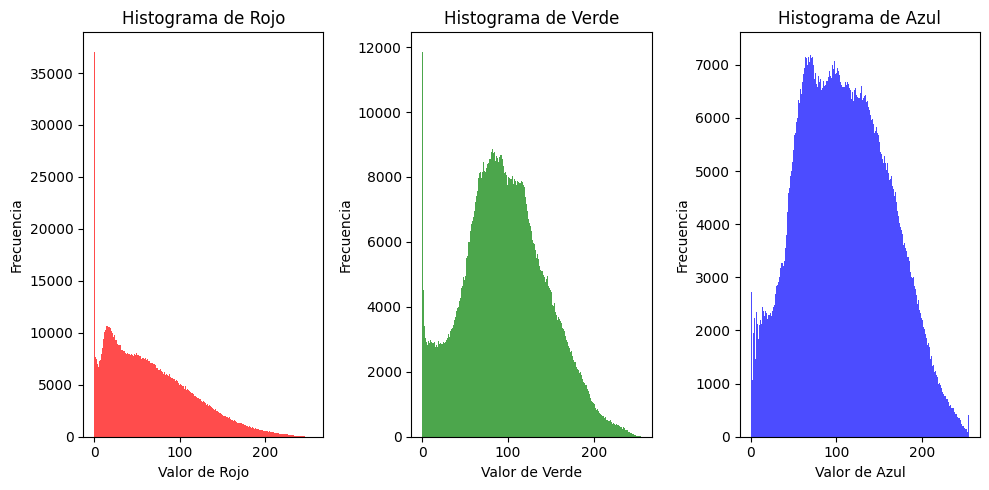

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(pixel_red_fake, bins=256, color='red', alpha=0.7)
plt.title('Histograma de Rojo')
plt.xlabel('Valor de Rojo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(pixel_green_fake, bins=256, color='green', alpha=0.7)
plt.title('Histograma de Verde')
plt.xlabel('Valor de Verde')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(pixel_blue_fake, bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Azul')
plt.xlabel('Valor de Azul')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

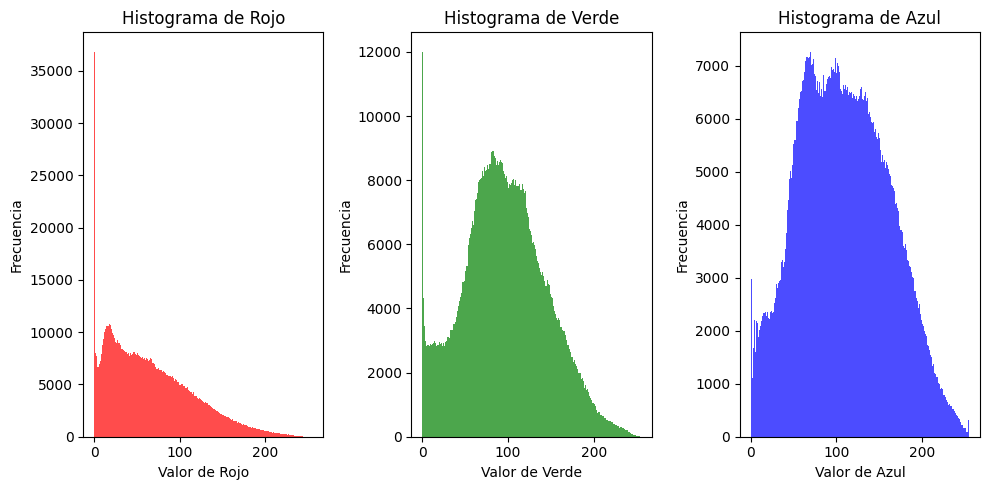

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(pixel_red_truth, bins=256, color='red', alpha=0.7)
plt.title('Histograma de Rojo')
plt.xlabel('Valor de Rojo')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(pixel_green_truth, bins=256, color='green', alpha=0.7)
plt.title('Histograma de Verde')
plt.xlabel('Valor de Verde')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(pixel_blue_truth, bins=256, color='blue', alpha=0.7)
plt.title('Histograma de Azul')
plt.xlabel('Valor de Azul')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

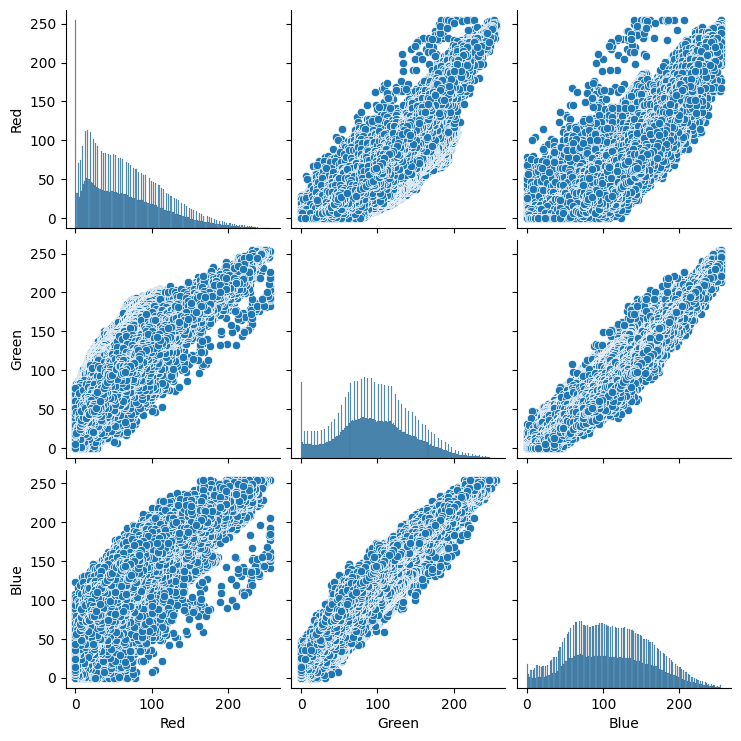

In [ ]:
sns.pairplot(data_fake)

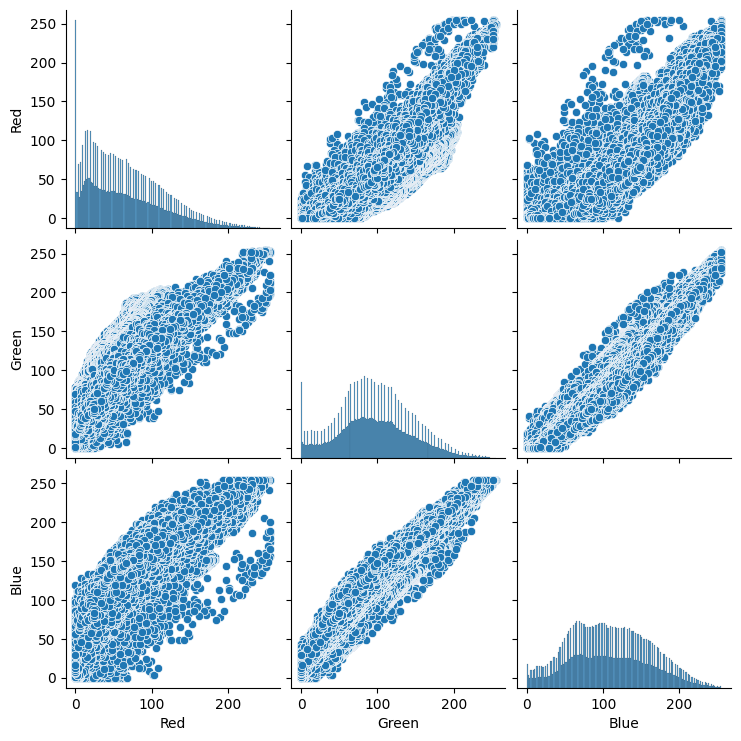

In [ ]:
sns.pairplot(data_truth)

<Axes: >

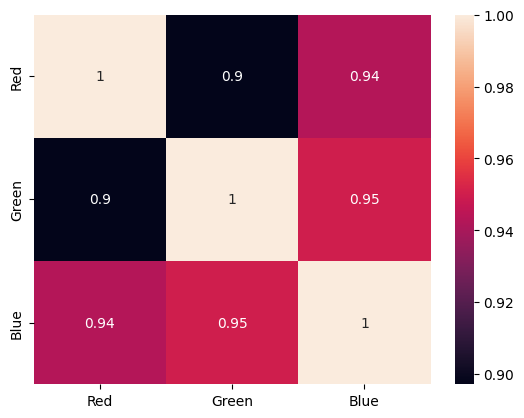

In [ ]:
canales_rgb_fake=data_fake.drop(['Pixel'],axis=1)
sns.heatmap(canales_rgb_fake.corr(), annot=True)

<Axes: >

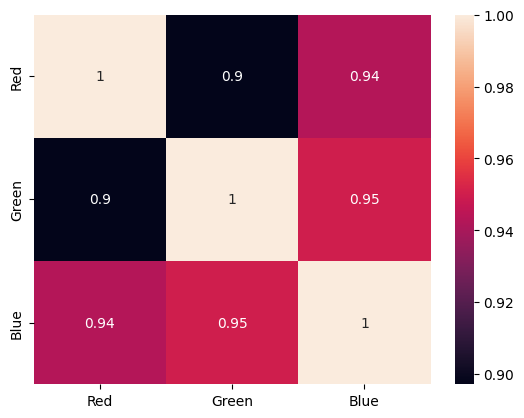

In [ ]:
canales_rgb_truth=data_fake.drop(['Pixel'],axis=1)
sns.heatmap(canales_rgb_truth.corr(), annot=True)

<ipython-input-86-87b94e60634d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_fake[column], palette='Set3')


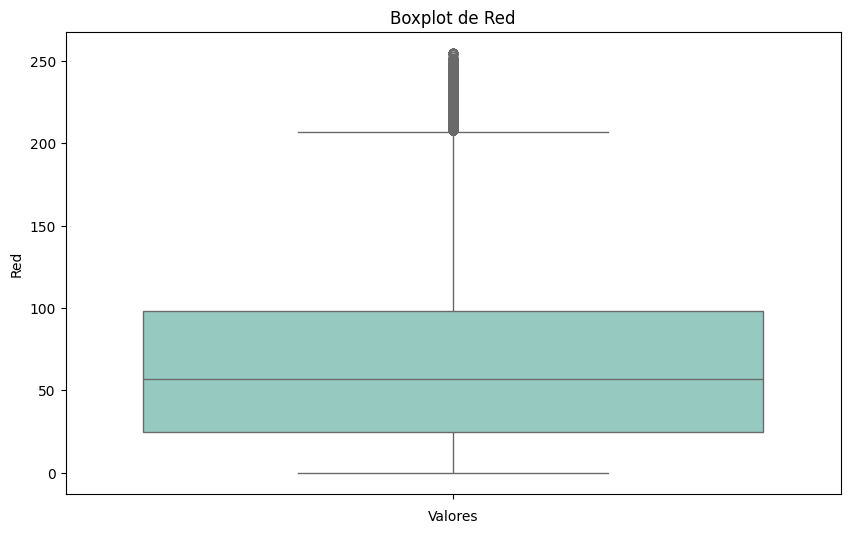

<ipython-input-86-87b94e60634d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_fake[column], palette='Set3')


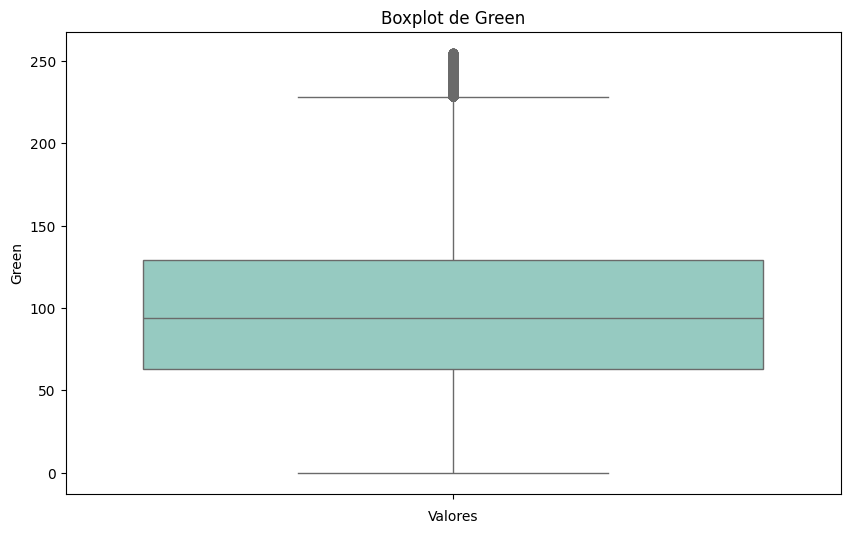

<ipython-input-86-87b94e60634d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_fake[column], palette='Set3')


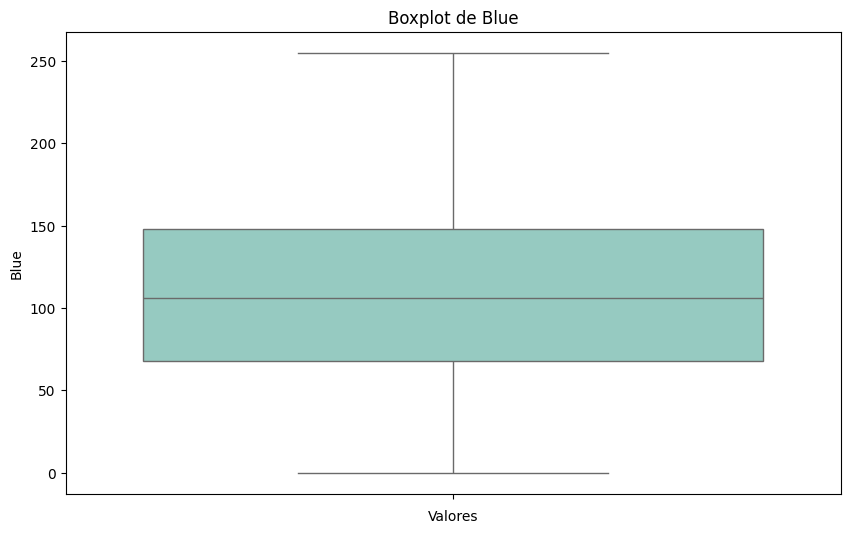

In [ ]:
for column in canales_rgb_fake.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=canales_rgb_fake[column], palette='Set3')
    plt.title(f'Boxplot de {column}')
    plt.xlabel('Valores')
    plt.ylabel(column)
    plt.show()

<ipython-input-87-96844d98e097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_truth[column], palette='Set3')


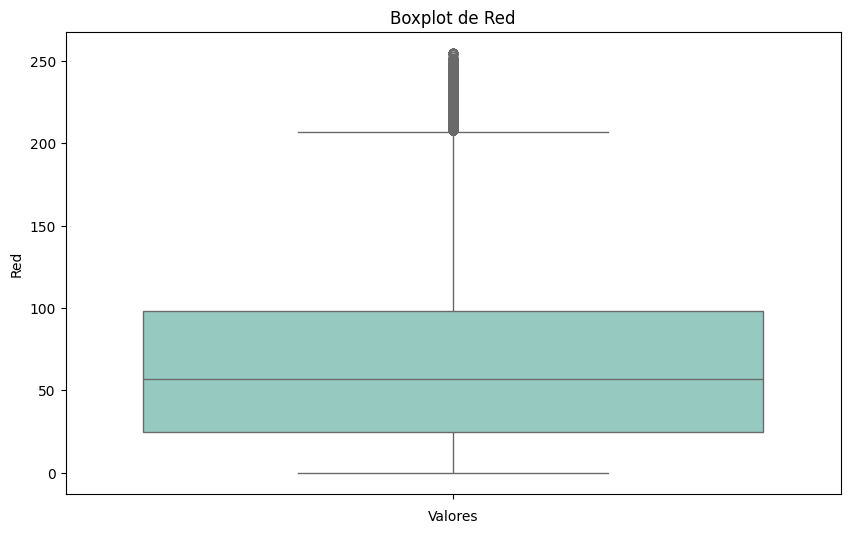

<ipython-input-87-96844d98e097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_truth[column], palette='Set3')


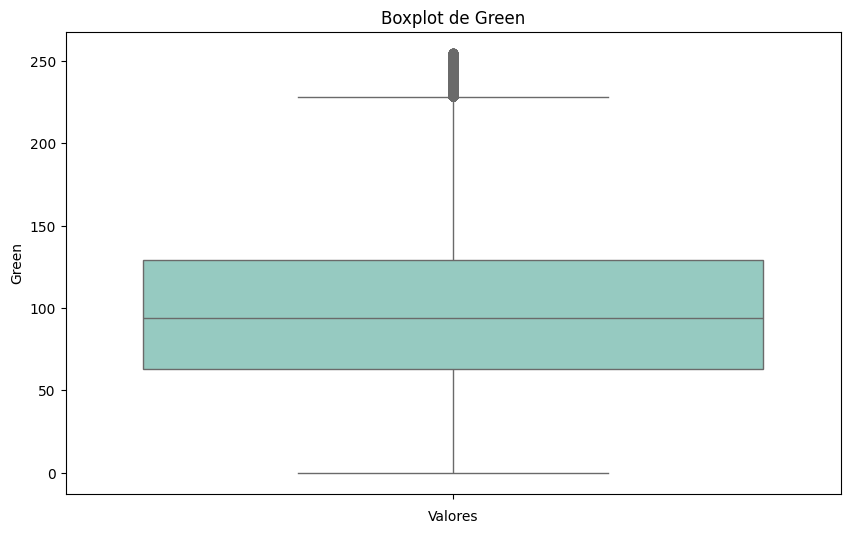

<ipython-input-87-96844d98e097>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=canales_rgb_truth[column], palette='Set3')


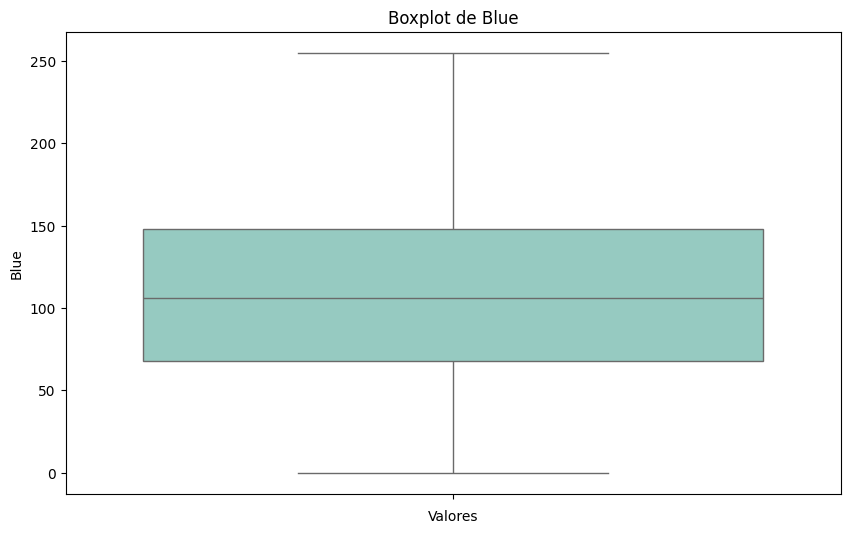

In [ ]:
for column in canales_rgb_truth.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=canales_rgb_truth[column], palette='Set3')
    plt.title(f'Boxplot de {column}')
    plt.xlabel('Valores')
    plt.ylabel(column)
    plt.show()

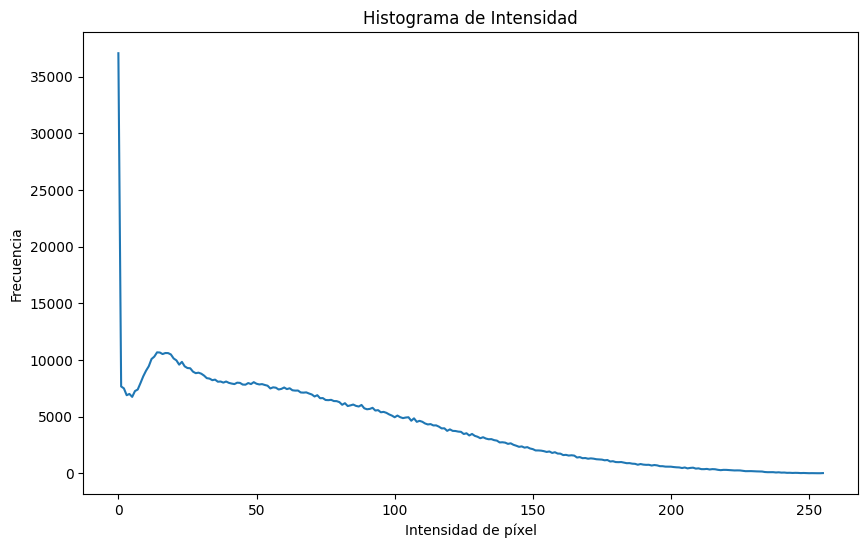

In [ ]:
hist = cv2.calcHist([image_fake], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.figure(figsize=(10, 6))
plt.plot(hist)
plt.title('Histograma de Intensidad')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

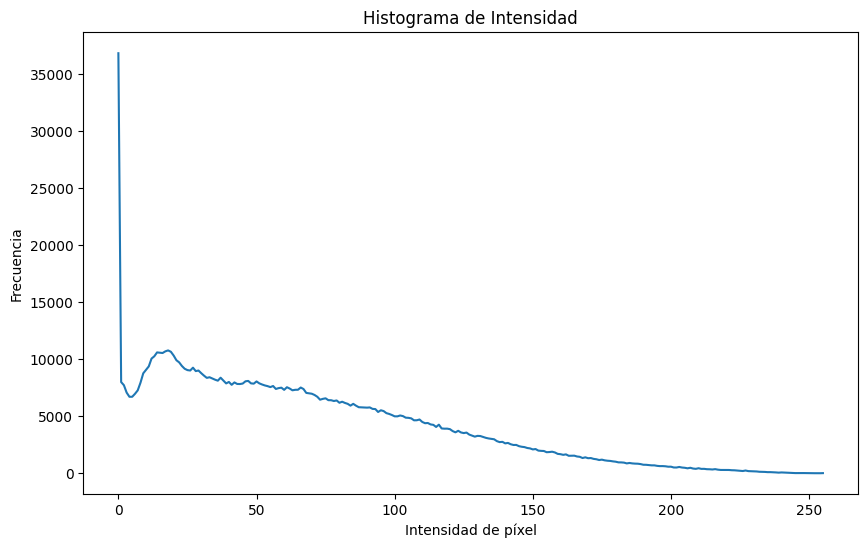

In [ ]:
hist = cv2.calcHist([image_truth], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.figure(figsize=(10, 6))
plt.plot(hist)
plt.title('Histograma de Intensidad')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.show()

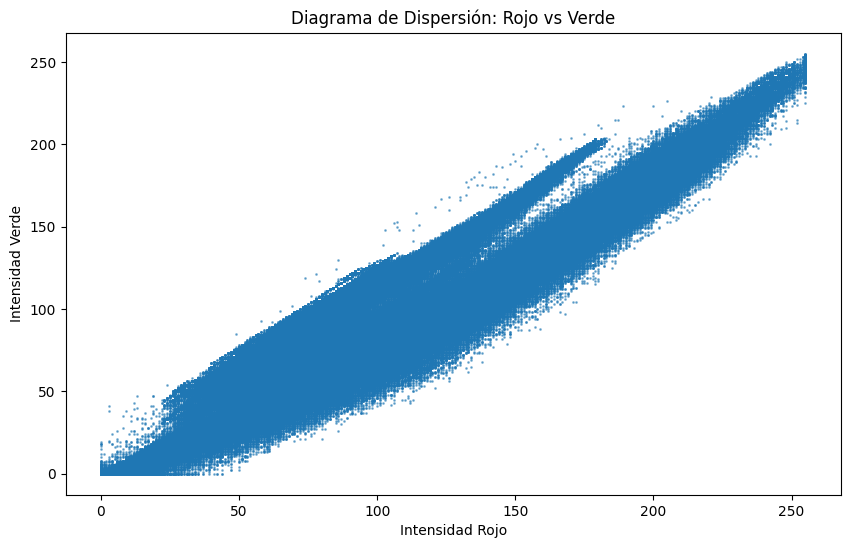

In [ ]:
image_rgb = cv2.cvtColor(image_truth, cv2.COLOR_BGR2RGB)

# Extraer los canales rojo y verde
red = image_rgb[:, :, 0].flatten()
green = image_rgb[:, :, 1].flatten()

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(red, green, alpha=0.5, s=1)
plt.title('Diagrama de Dispersión: Rojo vs Verde')
plt.xlabel('Intensidad Rojo')
plt.ylabel('Intensidad Verde')
plt.show()

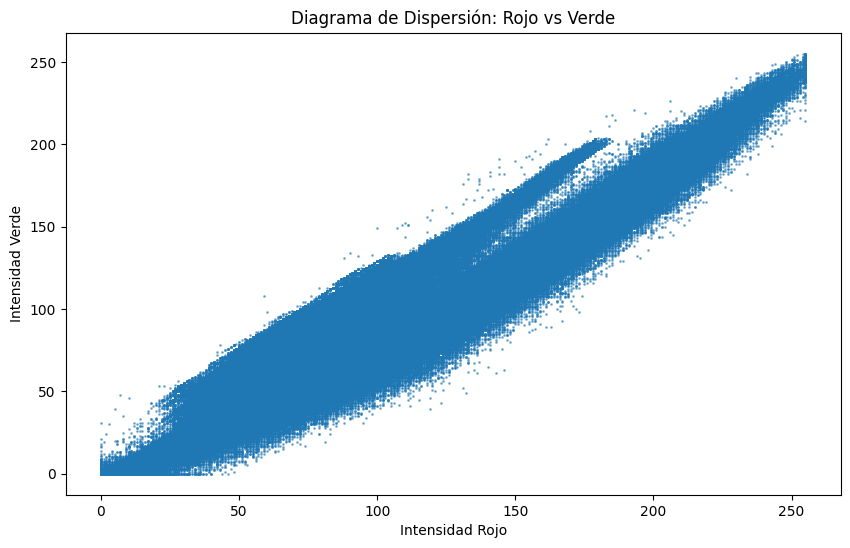

In [ ]:
image_rgb = cv2.cvtColor(image_fake, cv2.COLOR_BGR2RGB)

# Extraer los canales rojo y verde
red = image_rgb[:, :, 0].flatten()
green = image_rgb[:, :, 1].flatten()

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(red, green, alpha=0.5, s=1)
plt.title('Diagrama de Dispersión: Rojo vs Verde')
plt.xlabel('Intensidad Rojo')
plt.ylabel('Intensidad Verde')
plt.show()